# Validation et vizu tests 3d

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import joblib
from matplotlib import colors

In [9]:
def read_pickle(path):
    '''
    function to read a pickle file
    '''
    
    with open(path, 'rb')as file:
        f_read = pickle.load(file)
    
    return f_read

In [6]:
%config Completer.use_jedi = False

In [45]:
cm = 1/2.54  # centimeters in inches
barCol      = [134/255,190/255,181/255] #vert
crevasseCol = [211/255,131/255,86/255]  #light blue
palustreCol = [33/255,131/255,126/255]  #teil
chenalCol   = [212/255,189/255,125/255] #beige
floodCol    = [42/255,88/255,126/255]   #bleu
fanCol      = [111/255,136/255,145/255] #grey
#floodCol   = [223/255,232/255,232/255]  
white = [255,255,255]

col3f = [fanCol, chenalCol,floodCol]
col5f = [fanCol, chenalCol, barCol, crevasseCol, floodCol]
col6f = [floodCol,palustreCol,crevasseCol,barCol,chenalCol,fanCol]

cmap_3f = colors.ListedColormap(col3f)
cmap_5f = colors.ListedColormap(col5f)
cmap_6f = colors.ListedColormap(col6f)


## Load simulation

In [101]:
path_simu = '/mnt/chyn_hydrogen/projects/2019_roussillon/01_data/04_outputs_simulation/'

nombre_test = 6
test_sets   = []
for i in range(nombre_test):
    simu_set = []
    
    for s in range(4):
        simu = joblib.load(path_simu+'test_{}/simu_int{}.pickle'.format(i,s))
        simu_set.append(simu)
        
    test_sets.append(simu_set)

In [102]:
with open('/mnt/chyn_hydrogen/projects/2019_roussillon/01_data/04_outputs_simulation/test_info.txt','r') as file:
    infos = file.readlines()

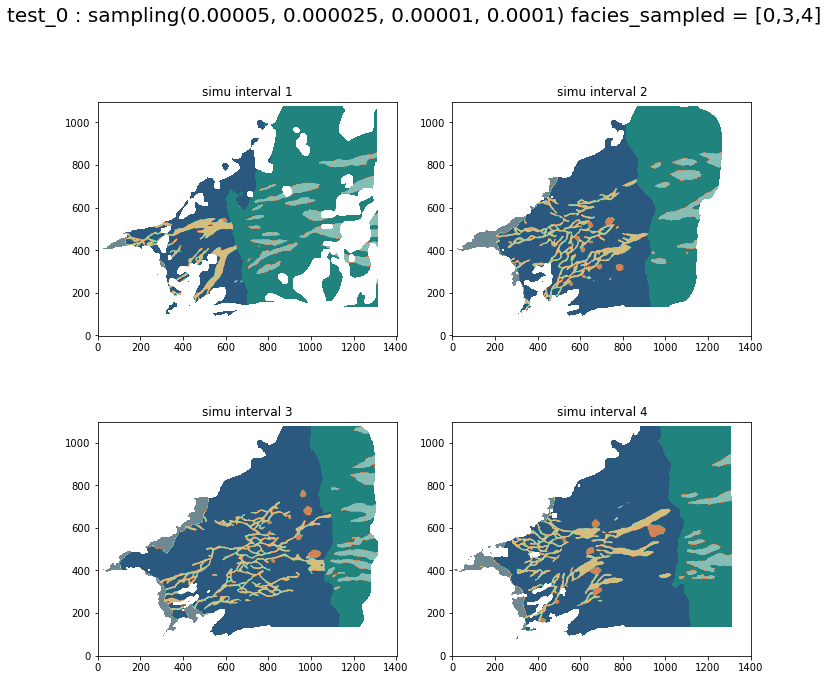

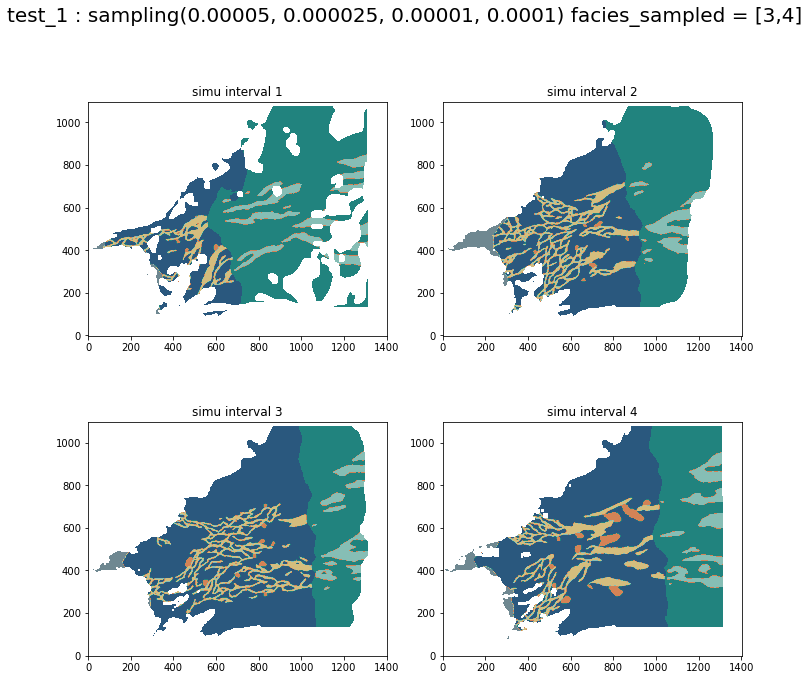

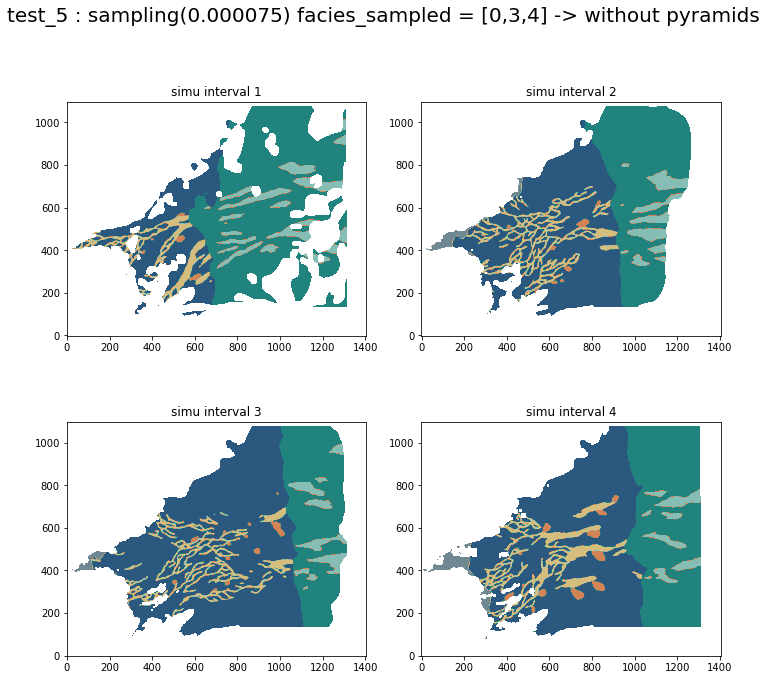

In [103]:
test_to_show = [0, 1, 5]
for i, set_nb in enumerate(test_to_show):
    plt.subplots(2,2,figsize=(10,10))
    count = 1
    for simu in test_sets[set_nb]:
        plt.subplot(2,2,count)
        plt.imshow(simu[0,4],cmap=cmap_6f,origin='lower')
        plt.title('simu interval {}'.format(count))
        count+=1
        
    plt.suptitle(infos[set_nb],fontsize=20)    
    plt.tight_layout()
    plt.show()

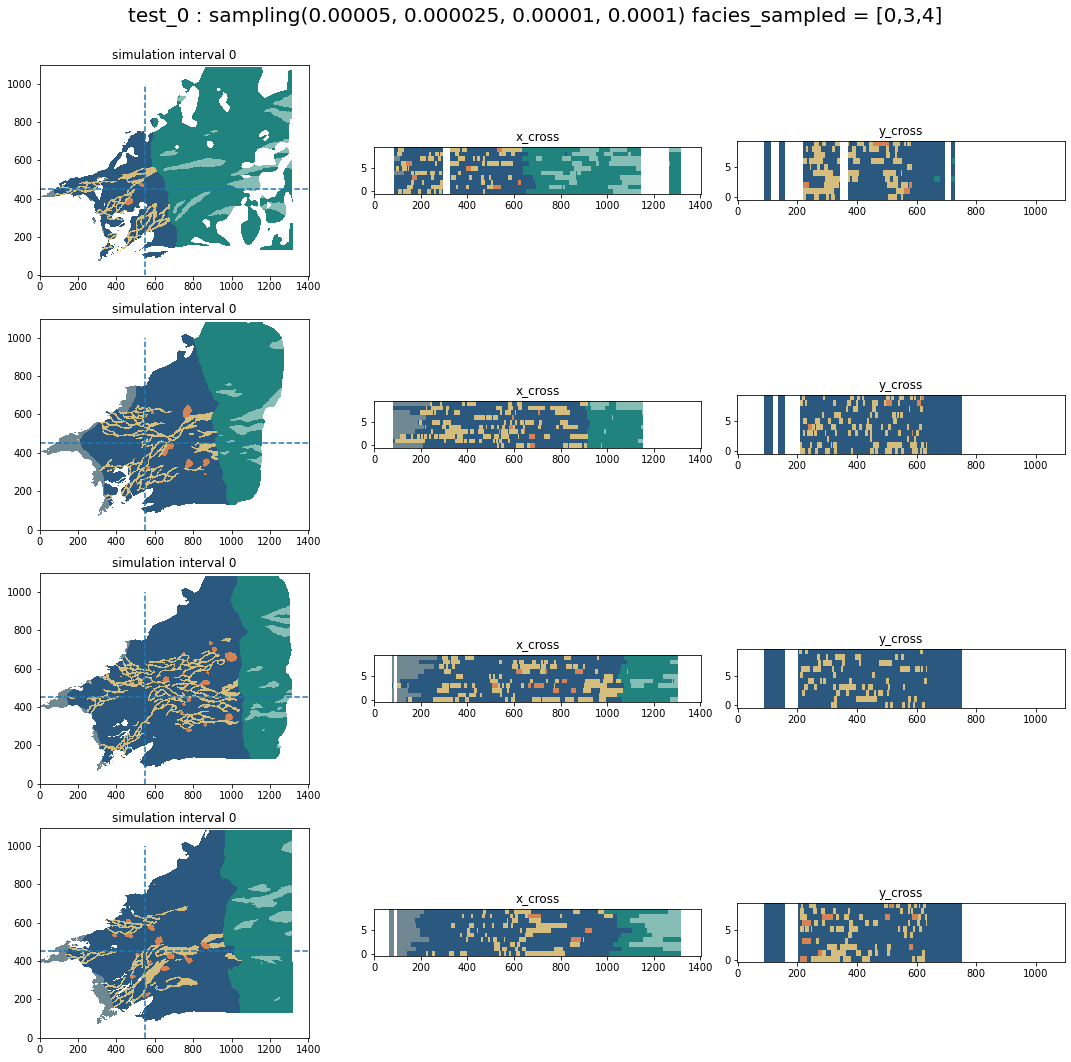

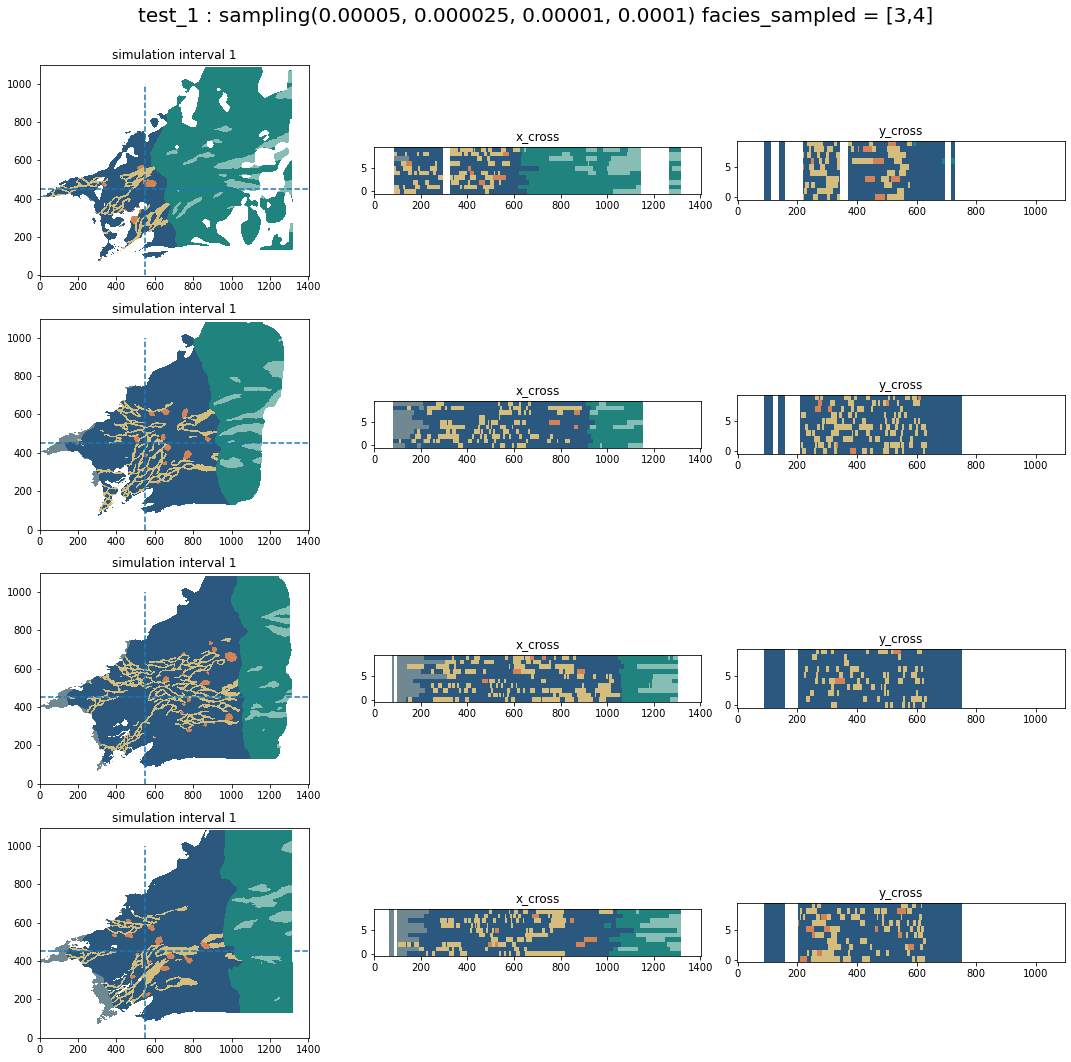

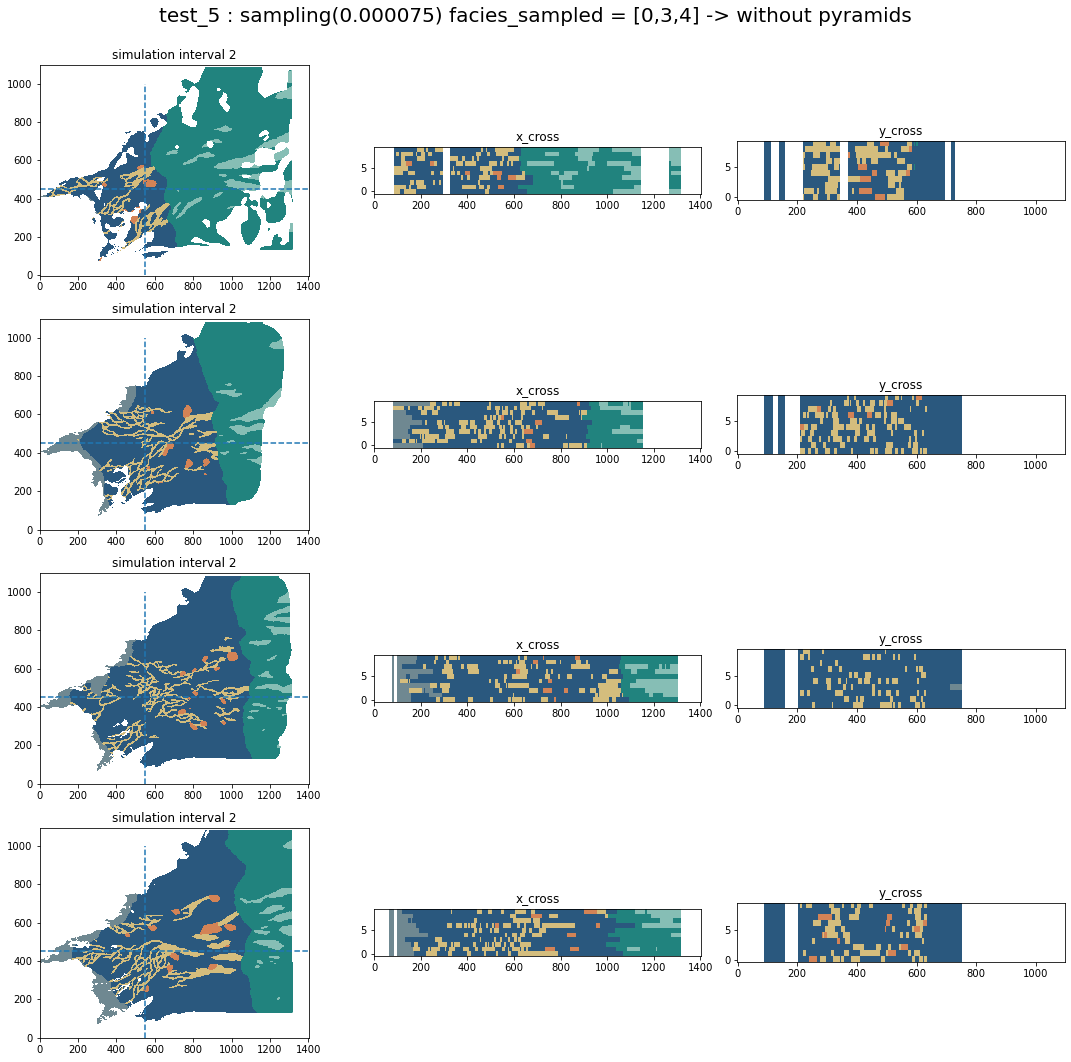

In [104]:
x_cross = 550
y_cross = 450
origin  = 'lower'

for i, set_nb in enumerate(test_to_show):
    plt.subplots(4,3,figsize=(15,15))
    count = 0
    for simu in test_sets[set_nb]:
        plt.subplot(4,3,1+count*3)
        plt.title('simulation interval {}'.format(i))
        plt.imshow(simu[0][0],origin=origin,cmap=cmap_6f,interpolation='none')
        plt.hlines(y_cross,0,1400,linestyles='--')
        plt.vlines(x_cross,0,1000,linestyles='--')
        plt.subplot(4,3,2+count*3)
        plt.title('x_cross')
        plt.imshow(simu[0,:,y_cross,:],origin=origin,aspect=20,cmap=cmap_6f,vmin=0,vmax=5,interpolation='none')
        plt.subplot(4,3,3+count*3)
        plt.title('y_cross')
        plt.imshow(simu[0,:,:,x_cross],origin=origin,aspect=20,cmap=cmap_6f,vmin=0,vmax=5,interpolation='none')
        plt.tight_layout()
        plt.suptitle(infos[set_nb],fontsize=20)    
        plt.tight_layout()  
        count+=1
    plt.savefig('test_set{}.png'.format(set_nb))
    plt.show()
        


## From vizualisation point of view best one are sampling without pyramids, sampling rate of 0.0005, facies sampled [0,3,4]. [3.4] -> test set 0 and 1

In [84]:
len(test_sets[test_set_index[0]])

4

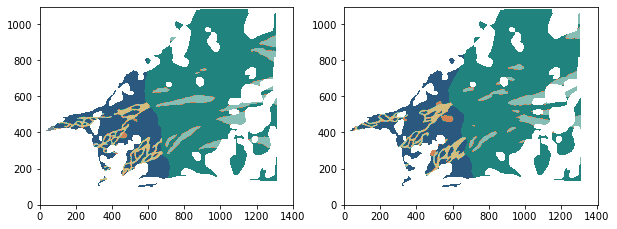

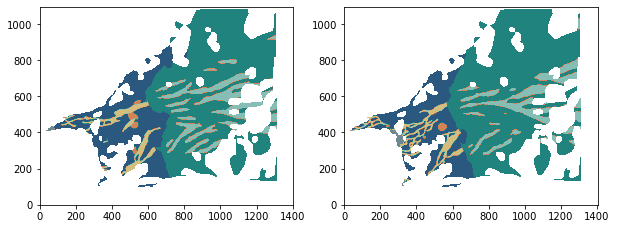

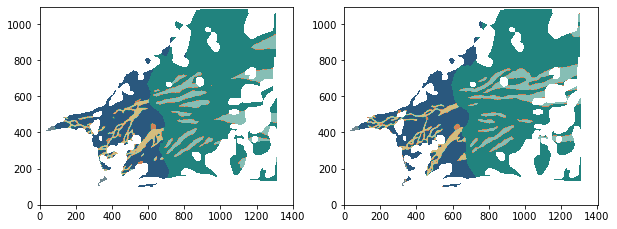

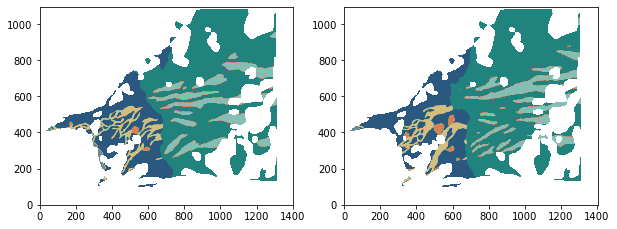

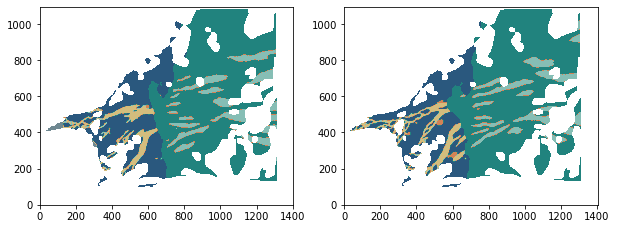

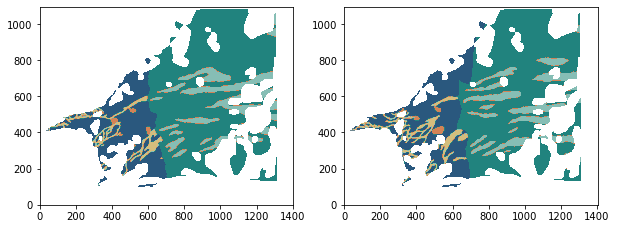

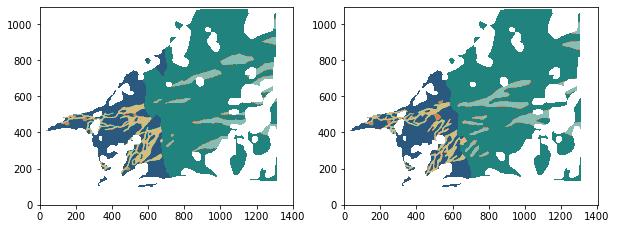

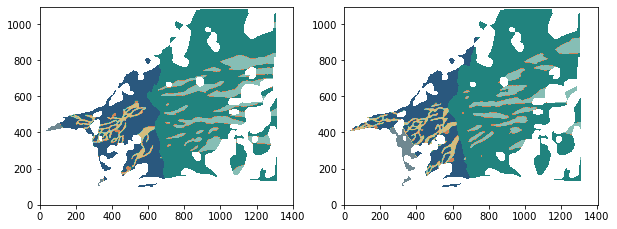

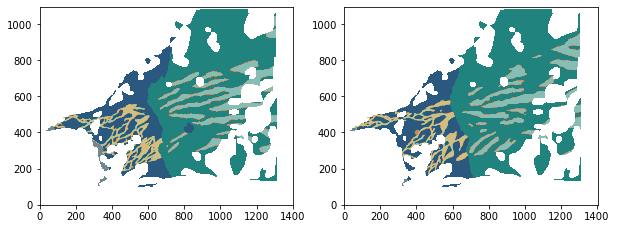

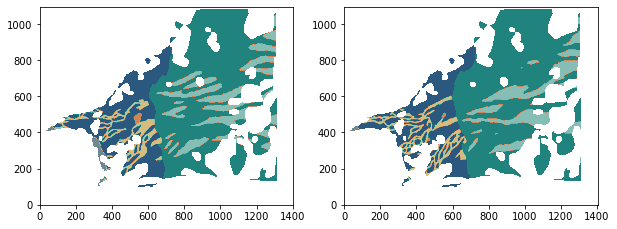

In [106]:
test_set_index = [0,5]
for i in range(10):
    plt.subplots(1,2,figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(test_sets[test_set_index[0]][0][0,i],cmap=cmap_6f,origin='lower')
    plt.subplot(1,2,2)
    plt.imshow(test_sets[test_set_index[1]][0][0,i],cmap=cmap_6f,origin='lower')
    #plt.subplot(1,3,3)
    #plt.imshow(test_sets[test_set_index[2]][0][0,i],cmap=cmap_6f,origin='lower')
    plt.show()